__# Decision Tree__

 Chance of Rainy  UV Index  Umbrella
             0.1        11      True
             0.9         1      True
             0.3         3     False
             0.1         2     False
Shall I take an umbrella with me?

|--- UV Index <= 1.5
|   |--- class: True
|--- UV Index >  1.5
|   |--- UV Index <= 7.0
|   |   |--- class: False
|   |--- UV Index >  7.0
|   |   |--- class: True



/media/dell/New Volume/RajArun/j-lab/my_project_env/lib/python3.8/site-packages/sklearn/tree/_export.py:184: FutureWarning: 'rotate' has no effect and is deprecated in 0.23. It will be removed in 1.0 (renaming of 0.25).
  warnings.warn(("'rotate' has no effect and is deprecated in 0.23. "
/tmp/ipykernel_20241/1267640231.py:47: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


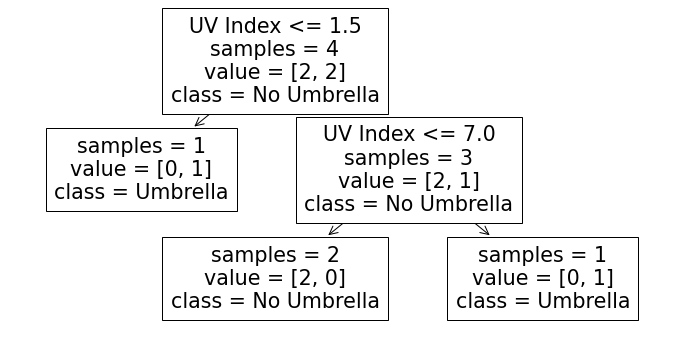

In [13]:
#Decision Tree Classifier:

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text


'''
##Extracting rules  from decision tree
'''


df_umbrella = pd.DataFrame(
    {
        'Chance of Rainy': [.1, .9, .3, .1,],
        'UV Index': [11, 1, 3, 2,],
        'Umbrella': [True, True, False, False, ],
    }
)

print(df_umbrella.to_string(index=False))

feature_names = ['Chance of Rainy', 'UV Index']
target = 'Umbrella'

clf = DecisionTreeClassifier(
    # criterion='entropy'
).fit(
    df_umbrella[feature_names], df_umbrella[target]
)
'''
##Displaying Decision Tree###
'''
fig, ax = plt.subplots(figsize=(12, 6));

plot_tree(
    clf, 
    filled=False, 
    feature_names=feature_names, 
    class_names=['No Umbrella', 'Umbrella'],
    impurity=False,
    rotate=True,
    ax=ax,
)

fig.show()


print('Shall I take an umbrella with me?\n')
print(
    export_text(clf, feature_names=feature_names, spacing=3, decimals=1)
)

[feature_names[f] for f in clf.tree_.feature if f != -2]

[t for t in clf.tree_.threshold if t != -2]

clf.tree_.children_left

def get_code(tree, feature_names):
        left      = tree.tree_.children_left
        right     = tree.tree_.children_right
        threshold = tree.tree_.threshold
        features  = [feature_names[i] for i in tree.tree_.feature]
        value = tree.tree_.value

        def recurse(left, right, threshold, features, node):
                if (threshold[node] != -2):
                        print( "if ( " + features[node] + " <= " + str(threshold[node]) + " ) {" )
                        if left[node] != -1:
                                recurse (left, right, threshold, features,left[node])
                        print ("} else {")
                        if right[node] != -1:
                                recurse (left, right, threshold, features,right[node])
                        print( "}")
                else:
                        print ("return " + str(value[node][0][1]))

        recurse(left, right, threshold, features, 0)
        

        

In [12]:
get_code(clf, feature_names)

if ( Chance of Rainy <= 0.5999999940395355 ) {
if ( UV Index <= 7.0 ) {
return 0.0
} else {
return 1.0
}
} else {
return 1.0
}


Logistic Regression: Accuracy (6-fold): 0.94 ~ 0.99
Decision Tree Classifier: Accuracy (6-fold): 0.91 ~ 0.99


/tmp/ipykernel_20241/3911442081.py:155: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


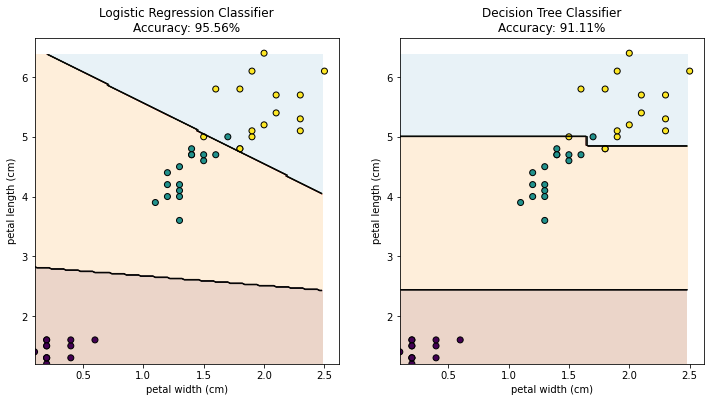

In [22]:
'''
Plotting decision boundary between logistic regression and decision tree classifier

'''

import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# It's customary to call dataframes df

df = pd.DataFrame(
    iris.data,
    columns=iris.feature_names
)

df['target'] = pd.Series(
    iris.target
)

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.3, random_state=22)

x_train = df_train[iris.feature_names]
x_test  = df_test[iris.feature_names]

y_train = df_train['target']
y_test  = df_test['target']

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate


num_folds = 6

clf = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)

accuracy_scores = cross_validate(clf, df[iris.feature_names], df['target'], cv=num_folds, scoring=['accuracy'])

accuracy_mean = pd.Series(accuracy_scores['test_accuracy']).mean()
accuracy_std = pd.Series(accuracy_scores['test_accuracy']).std()
accuracy_sterror = accuracy_std / np.sqrt(num_folds)

print(
    'Logistic Regression: Accuracy ({}-fold): {:.2f} ~ {:.2f}'.format(
        num_folds,
        (accuracy_mean - 1.96 * accuracy_sterror),
        (accuracy_mean + 1.96 * accuracy_sterror),
    )
)

clf.fit(x_train, y_train)

# We use dictionary comprehension instead of a for-loop
df_coef = pd.DataFrame(
   {
        f'Coef [Class {class_id}]': clf.coef_[class_id]
        for class_id in range(clf.coef_.shape[0])
    },
    index=iris.feature_names
)
df_coef.loc['intercept', :] = clf.intercept_

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

num_folds = 6

clf = DecisionTreeClassifier(max_depth=3)
accuracy_scores = cross_validate(clf, df[iris.feature_names], df['target'], cv=num_folds, scoring=['accuracy'])

accuracy_mean = pd.Series(accuracy_scores['test_accuracy']).mean()
accuracy_std = pd.Series(accuracy_scores['test_accuracy']).std()
accuracy_sterror = accuracy_std / np.sqrt(num_folds)

print(
    'Decision Tree Classifier: Accuracy ({}-fold): {:.2f} ~ {:.2f}'.format(
        num_folds,
        (accuracy_mean - 1.96 * accuracy_sterror),
        (accuracy_mean + 1.96 * accuracy_sterror),
    )
)

# Function to Plot the Decision Boundaries

def plot_decision_boundary(clf, x, y, ax, title):
    
    cmap='Paired_r'
    
    feature_names = x.columns
    x, y = x.values, y.values
    
    x_min, x_max = x[:,0].min(), x[:,0].max()
    y_min, y_max = x[:,1].min(), x[:,1].max()
    
    step = 0.02
    
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, step),
        np.arange(y_min, y_max, step)
    )
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    ax.contour(xx, yy, Z, colors='k', linewidths=0.7)
    ax.scatter(x[:,0], x[:,1], c=y, edgecolors='k')
    ax.set_title(title)
    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])
    
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.3, random_state=22)

x_train = df_test[iris.feature_names]
x_test  = df_test[iris.feature_names]

y_train = df_train['target']
y_test  = df_test['target']

from sklearn.metrics import accuracy_score
    
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

two_features = ['petal width (cm)', 'petal length (cm)']


clf_lr = LogisticRegression()
clf_lr.fit(df_train[two_features], df_train['target'])
accuracy = accuracy_score(
    df_test['target'], 
    clf_lr.predict(df_test[two_features])
)
plot_decision_boundary(
    clf_lr, df_test[two_features], df_test['target'], ax=axs[0], 
    title=f'Logistic Regression Classifier\nAccuracy: {accuracy:.2%}'
)

clf_dt = DecisionTreeClassifier(max_depth=3)
clf_dt.fit(df_train[two_features], df_train['target'])
accuracy = accuracy_score(
    df_test['target'], 
    clf_dt.predict(df_test[two_features])
)
plot_decision_boundary(
    clf_dt, df_test[two_features], df_test['target'], ax=axs[1], 
    title=f'Decision Tree Classifier\nAccuracy: {accuracy:.2%}'
)

fig.show()



/tmp/ipykernel_3407/2766036729.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_3407/2766036729.py:75: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_3407/2766036729.py:114: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


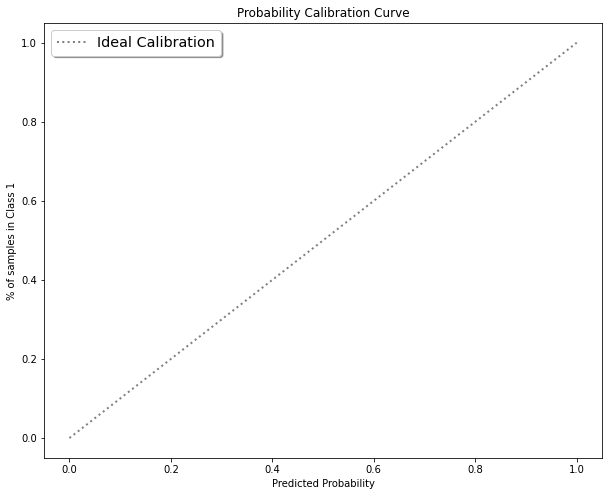

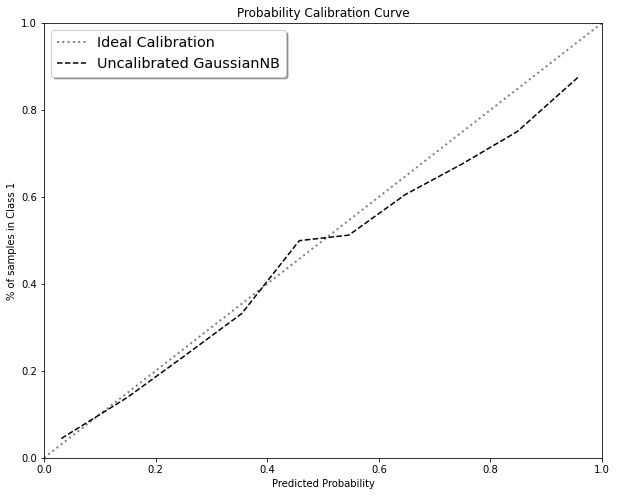

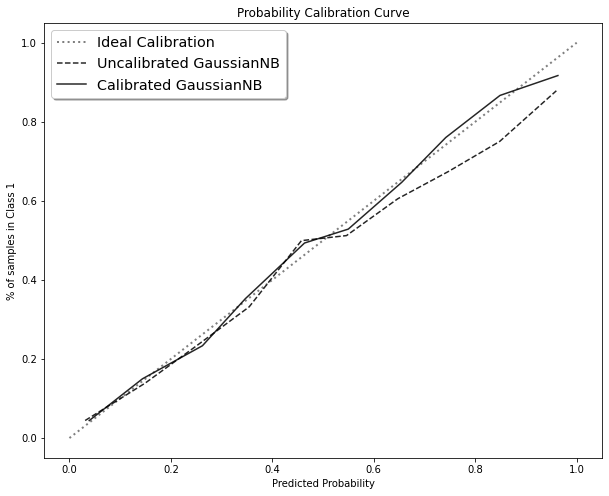

In [3]:
'''Caliberation Curve'''
from sklearn.datasets import make_multilabel_classification
import sklearn
import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt

from sklearn.calibration import calibration_curve

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.plot(
    [0, 1], [0, 1], 
    linestyle=':', 
    lw=2, color='k',
    label='Ideal Calibration', alpha=0.5
)

ax.set_title('Probability Calibration Curve')
ax.set_xlabel('Predicted Probability')
ax.set_ylabel('% of samples in Class 1')

ax.legend(loc="upper left", fontsize='x-large', shadow=True)

fig.show()



from sklearn.datasets import make_classification

x, y = make_classification(
    n_samples=50000, n_features=15, n_informative=5, n_redundant=10, n_classes=2, class_sep=0.001
)

x.shape, y.shape



from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred_proba = clf.predict_proba(x_test)[:,-1]

from sklearn.calibration import calibration_curve

fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_pred_proba, n_bins=10)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.plot(
    [0, 1], [0, 1], 
    linestyle=':', 
    lw=2, color='k',
    label='Ideal Calibration', alpha=0.5
)

ax.plot(
    mean_predicted_value, fraction_of_positives, "--", label='Uncalibrated GaussianNB', color='k'
)

ax.set_title('Probability Calibration Curve')
ax.set_xlabel('Predicted Probability')
ax.set_ylabel('% of samples in Class 1')
ax.set_xlim((0,1))
ax.set_ylim((0,1))

ax.legend(loc="upper left", fontsize='x-large', shadow=True)

fig.show()

from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB

clf_calib = CalibratedClassifierCV(GaussianNB(), cv=3, method='isotonic')
clf_calib.fit(x_train, y_train)
y_pred_calib = clf_calib.predict(x_test)
y_pred_proba_calib = clf_calib.predict_proba(x_test)[:,-1]

from sklearn.calibration import calibration_curve

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.plot(
    [0, 1], [0, 1], 
    linestyle=':', 
    lw=2, color='k',
    label='Ideal Calibration', alpha=0.5
)

fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_pred_proba, n_bins=10)

ax.plot(
    mean_predicted_value, fraction_of_positives, "--", label='Uncalibrated GaussianNB', color='k', alpha=0.85
)

fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_pred_proba_calib, n_bins=10)

ax.plot(
    mean_predicted_value, fraction_of_positives, "-", label='Calibrated GaussianNB', color='k', alpha=0.85
)

ax.set_title('Probability Calibration Curve')
ax.set_xlabel('Predicted Probability')
ax.set_ylabel('% of samples in Class 1')

ax.legend(loc="upper left", fontsize='x-large', shadow=True)

fig.show()

In [24]:
'''Precision @ k'''

def precision_at_k_score(y_true, y_pred_proba, k=1000, pos_label=1):
    topk = [
        y_true_ == pos_label 
        for y_true_, y_pred_proba_ 
        in sorted(
            zip(y_true, y_pred_proba), 
            key=lambda y: y[1], 
            reverse=True
        )[:k]
    ]
    return sum(topk) / len(topk)

for k in 1000, 1500, 3000, 6000:
    print(
        'precision @ k={:,}: {:.2%}'.format(
            k, precision_at_k_score(y_test, y_pred_proba, k=k)
        )
    )

In [9]:
'''Equal  Opportunity Score'''

df_engineers = pd.DataFrame(
    {
        'IQ': [110, 120, 124, 123, 112, 114],
        'Gender': ['M', 'F', 'M', 'F', 'M', 'F'],
        'Is Hired? (True Label)': [0, 1, 1, 1, 1, 0],
        'Is Hired? (Predicted Label)': [1, 0, 1, 1, 1, 0],
    }
)
equal_opportunity = df_engineers[ 
    (
        df_engineers['Is Hired? (True Label)'] == 1
    ) & (
        df_engineers['Gender'] == 'F'
    )
]['Is Hired? (Predicted Label)'].mean() / df_engineers[ 
    (
        df_engineers['Is Hired? (True Label)'] == 1
    ) & (
        df_engineers['Gender'] != 'F'
    )
]['Is Hired? (Predicted Label)'].mean()


equal_opportunity = df_engineers[ 
    (
        df_engineers['Is Hired? (True Label)'] == 1
    ) & (
        df_engineers['Gender'] == 'M'
    )
]['Is Hired? (Predicted Label)'].mean() / df_engineers[ 
    (
        df_engineers['Is Hired? (True Label)'] == 1
    ) & (
        df_engineers['Gender'] != 'M'
    )
]['Is Hired? (Predicted Label)'].mean()

def equal_opportunity_score(df, true_label, predicted_label, feature_name, feature_value):
    opportunity_to_value = df[
        (df[true_label] == 1) & (df[feature_name] == feature_value)
    ][predicted_label].mean() / df[
        (df[true_label] == 1) & (df[feature_name] != feature_value)
    ][predicted_label].mean()
    opportunity_to_other_values = 1 / opportunity_to_value
    better_opportunity_to_value = opportunity_to_value > opportunity_to_other_values
    return {
        'Score': min(opportunity_to_value, opportunity_to_other_values),
        f'Better Opprtunity to {feature_value}': better_opportunity_to_value
    }

equal_opportunity_score(
    df=df_engineers, 
    true_label='Is Hired? (True Label)', 
    predicted_label='Is Hired? (Predicted Label)', 
    feature_name='Gender',
    feature_value='F'
)


{'Score': 0.5, 'Better Opprtunity to F': False}

<AxesSubplot:title={'center':'KMeans: Silhouette Score vs # Clusters chosen'}, xlabel='n_clusters'>

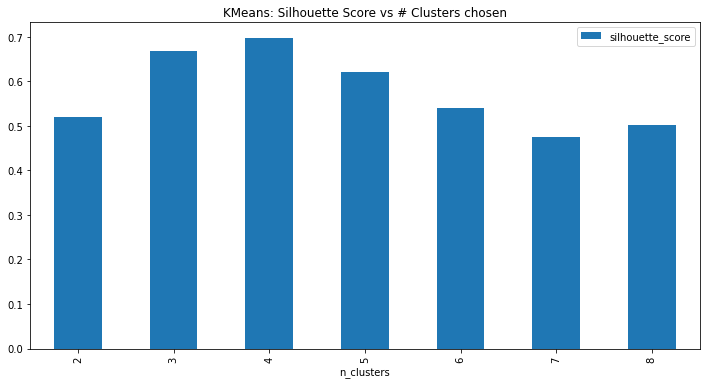

In [12]:
'''The silhouette score'''

from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples=100, centers=4, n_features=2, cluster_std=[1, 1.5, 2, 2], random_state=7)
df_blobs = pd.DataFrame(    {        'x1': x[:,0],        'x2': x[:,1],        'y': y    })

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_clusters_options = [2, 3, 4, 5, 6, 7, 8]
silhouette_scores = []

for i, n_clusters in enumerate(n_clusters_options):

    x, y = df_blobs[['x1', 'x2']], df_blobs['y']
    kmeans = KMeans(n_clusters=n_clusters, random_state=7)
    y_pred = kmeans.fit_predict(x)

    silhouette_scores.append(silhouette_score(x, y_pred))
    
ig, ax = plt.subplots(1, 1, figsize=(12, 6), sharey=False)

pd.DataFrame(
    {
        'n_clusters': n_clusters_options,
        'silhouette_score': silhouette_scores,
    }
).set_index('n_clusters').plot(
    title='KMeans: Silhouette Score vs # Clusters chosen',
    kind='bar',
    ax=ax
)